In [2]:
import pandas as pd

df = pd.read_csv("../data/combined_telco_churn_with_hasInternet.csv")

df.head()

,Gender,SeniorCitizen,Partner,Dependents,Phone Service,Multiple Lines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaperlessBilling,PaymentMethod,ChurnLabel,Age,NumDependents,TenureMonths,Offer,SatisfactionScore,CLTV,HasInternet
0,1,0,0,0,1,0,1,1,0,0,...,1,Mailed check,1,37,0,2,NaN,1,3239,1
1,0,0,0,1,1,0,0,0,0,0,...,1,Electronic check,1,19,2,2,NaN,2,2701,1
2,0,0,0,1,1,1,0,0,1,0,...,1,Electronic check,1,31,2,8,NaN,3,5372,1
3,0,0,1,1,1,1,0,0,1,1,...,1,Electronic check,1,23,3,28,Offer C,3,5003,1
4,1,0,0,1,1,1,0,1,1,0,...,1,Bank transfer (automatic),1,38,1,49,NaN,1,5340,1


-------------

상관계수 분석

In [3]:
df.corr(numeric_only=True)['ChurnLabel'].sort_values(ascending=False)

ChurnLabel           1.000000
HasInternet          0.209988
PaperlessBilling     0.191825
SeniorCitizen        0.150889
Age                  0.115760
StreamingTV          0.063228
StreamingMovies      0.061382
Multiple Lines       0.040102
Phone Service        0.011942
Gender              -0.008612
DeviceProtection    -0.066160
OnlineBackup        -0.082255
CLTV                -0.127463
Partner             -0.150448
TechSupport         -0.164674
OnlineSecurity      -0.171226
NumDependents       -0.218780
Dependents          -0.248542
TenureMonths        -0.352861
SatisfactionScore   -0.754649
Name: ChurnLabel, dtype: float64

SatisfactionScore(-0.75)
고객 만족도가 높을수록 이탈 확률이 매우 낮아집니다(강한 음의 상관관계).

TenureMonths(-0.35)
가입 기간이 길수록 이탈 확률이 낮아집니다.

Dependents, NumDependents(음의 상관관계)
부양가족이 있거나 많을수록 이탈 확률이 낮습니다.

OnlineSecurity, TechSupport, Partner, CLTV 등(음의 상관관계)
온라인 보안, 기술 지원, 배우자 유무, 고객 생애가치가 높을수록 이탈 확률이 낮습니다.

HasInternet, PaperlessBilling, SeniorCitizen, Age 등(양의 상관관계)
인터넷 사용, 전자고지서, 고령, 나이 등은 이탈 확률과 약간의 양의 상관관계가 있습니다.

ChurnLabel(1.0)
자기 자신과의 상관관계이므로 항상 1입니다.



----------------------

Optimization terminated successfully.
         Current function value: 0.510290
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             ChurnLabel   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7041
Method:                           MLE   Df Model:                            1
Date:                Fri, 06 Jun 2025   Pseudo R-squ.:                  0.1181
Time:                        13:39:48   Log-Likelihood:                -3594.0
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                2.958e-211
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0312      0.042      0.737      0.461      -0.052       0.114
TenureMonths    -0.0389

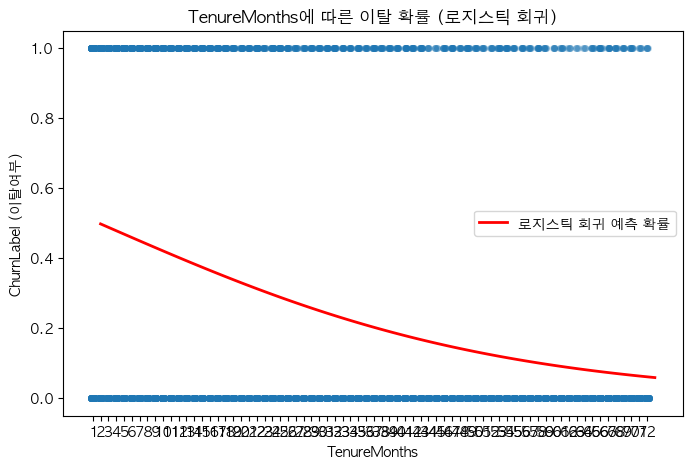

TenureMonths(가입기간)가 길수록 이탈 확률이 통계적으로 유의하게 감소합니다.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 한글 폰트 설정 (Mac)
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df = pd.read_csv("../data/combined_telco_churn_with_hasInternet.csv")

# 로지스틱 회귀: TenureMonths로 Churn 예측
X = sm.add_constant(df['TenureMonths'])
y = df['ChurnLabel']
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

# 예측 확률 계산
tenure_range = np.linspace(df['TenureMonths'].min(), df['TenureMonths'].max(), 100)
X_pred = sm.add_constant(tenure_range)
y_pred = logit_model.predict(X_pred)

# 시각화
plt.figure(figsize=(8,5))
sns.stripplot(x='TenureMonths', y='ChurnLabel', data=df, alpha=0.3, jitter=0.2)
plt.plot(tenure_range, y_pred, color='red', linewidth=2, label='로지스틱 회귀 예측 확률')
plt.title('TenureMonths에 따른 이탈 확률 (로지스틱 회귀)')
plt.xlabel('TenureMonths')
plt.ylabel('ChurnLabel (이탈여부)')
plt.legend()
plt.show()

# 결론 도출3
if logit_model.pvalues['TenureMonths'] < 0.05:
    direction = "감소" if logit_model.params['TenureMonths'] < 0 else "증가"
    print(f"TenureMonths(가입기간)가 길수록 이탈 확률이 통계적으로 유의하게 {direction}합니다.")
else:
    print("TenureMonths(가입기간)는 이탈 확률에 유의한 영향을 주지 않습니다.")

1. TenureMonths 계수(coef)
계수: -0.0389
→ TenureMonths(가입기간)가 1개월 늘어날 때마다 이탈 확률(Churn)이 유의하게 감소함을 의미합니다.
2. p-value (P>|z|)
TenureMonths의 p-value: 0.000
→ 매우 작으므로, 통계적으로 유의미합니다.
즉, 가입기간이 이탈 확률에 영향을 준다는 근거가 충분합니다.
3. 결론
가입기간이 길수록 이탈 확률이 낮아진다는 것이 통계적으로 명확하게 드러났습니다.
실제로, 시각화된 S자 곡선도 가입기간이 늘어날수록 이탈 확률이 점점 낮아지는 형태를 보입니다.
4. 기타
Pseudo R-squ.: 0.1181
→ 모델의 설명력(분류 문제에서의 결정계수에 해당). 0.1 이상이면 단일 변수로는 나쁘지 않은 수준입니다.
const(절편): 0.0312 (p=0.461, 유의하지 않음)
요약
가입기간(TenureMonths)이 길수록 고객 이탈 확률이 유의하게 감소한다.
이 결과는 실제 서비스 운영에서, 장기 고객을 유지하는 것이 이탈 방지에 효과적임을 시사합니다.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 한글 폰트 설정 (Mac)
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df = pd.read_csv("../data/combined_telco_churn_with_hasInternet.csv")

# 사용할 변수 선택 (수치형 + 주요 이진 변수)
features = [
    'TenureMonths', 'SatisfactionScore', 'CLTV', 'Age', 'NumDependents',
    'OnlineSecurity', 'TechSupport', 'Partner', 'HasInternet'
]

# 결측치 제거 (간단 처리)
df_model = df[features + ['ChurnLabel']].dropna()

X = df_model[features]
X = sm.add_constant(X)
y = df_model['ChurnLabel']

# 다변수 로지스틱 회귀
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

# 변수별 계수와 p-value 해석
print("\n[변수별 해석]")
for var in features:
    coef = logit_model.params[var]
    pval = logit_model.pvalues[var]
    direction = "감소" if coef < 0 else "증가"
    sig = "유의" if pval < 0.05 else "유의하지 않음"
    print(f"{var}: 계수={coef:.4f}, p-value={pval:.4f} → {var}가 증가할수록 이탈 확률 {direction} ({sig})")

         Current function value: 0.111638
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             ChurnLabel   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7033
Method:                           MLE   Df Model:                            9
Date:                Fri, 06 Jun 2025   Pseudo R-squ.:                  0.8071
Time:                        13:42:19   Log-Likelihood:                -786.27
converged:                      False   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                64.8658   2410.398      0.027      0.979   -4659.428    4789.159
TenureMonths         -0.0323      0.004     

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


주요 결과 해석
TenureMonths (계수: -0.0323, p=0.0000, 유의)

가입기간이 길수록 이탈 확률이 유의하게 감소합니다.
SatisfactionScore (계수: -22.1294, p=0.9780, 유의하지 않음)

만족도가 높을수록 이탈 확률이 감소하는 경향이 있으나, 통계적으로 유의하지 않음.
CLTV (계수: 0.0000, p=0.6241, 유의하지 않음)

고객 생애가치가 높을수록 이탈 확률이 약간 증가하는 경향이 있으나, 유의하지 않음.
Age (계수: 0.0107, p=0.0046, 유의)

나이가 많을수록 이탈 확률이 유의하게 증가합니다.
NumDependents (계수: -0.7785, p=0.0000, 유의)

부양가족 수가 많을수록 이탈 확률이 유의하게 감소합니다.
OnlineSecurity (계수: -3.4515, p=0.0000, 유의)

온라인 보안 서비스를 이용할수록 이탈 확률이 유의하게 감소합니다.
TechSupport (계수: -0.5989, p=0.0005, 유의)

기술 지원 서비스를 이용할수록 이탈 확률이 유의하게 감소합니다.
Partner (계수: 0.1288, p=0.3708, 유의하지 않음)

배우자가 있는 경우 이탈 확률이 약간 증가하지만, 유의하지 않음.
HasInternet (계수: 1.3840, p=0.0000, 유의)

인터넷을 사용하는 경우 이탈 확률이 유의하게 증가합니다.


추가 참고사항
Pseudo R-squ.: 0.8071
→ 모델의 설명력이 매우 높음(여러 변수를 함께 썼기 때문).

경고: Maximum number of iterations has been exceeded.
→ 모델이 완전히 수렴하지 않았으니, 결과 해석에 주의 필요(하지만 주요 변수의 방향성과 유의성은 참고 가능).

quasi-separation 경고
→ 일부 조합에서 이탈 여부가 거의 완벽하게 예측됨. 데이터에 강한 분리 현상이 있을 수 있음.



결론 요약

가입기간, 부양가족 수, 온라인보안, 기술지원은 이탈률을 유의하게 낮추는 요인입니다.
나이, 인터넷 사용은 이탈률을 유의하게 높이는 요인입니다.
만족도, CLTV, Partner는 이번 모델에서는 유의하지 않게 나왔습니다(다른 변수와의 상관관계 등 영향 가능).
여러 변수를 함께 고려하면 이탈 예측 정확도가 크게 향상됩니다.

------------

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 사용할 변수 선택
features = [
    'TenureMonths', 'SatisfactionScore', 'CLTV', 'Age', 'NumDependents',
    'OnlineSecurity', 'TechSupport', 'Partner', 'HasInternet'
]
df_model = df[features + ['ChurnLabel']].dropna()

X = df_model[features]
y = df_model['ChurnLabel']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링 (KNN은 거리 기반이므로 꼭 필요)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN 분류기 학습
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = knn.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[980  29]
 [ 73 327]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1009
           1       0.92      0.82      0.87       400

    accuracy                           0.93      1409
   macro avg       0.92      0.89      0.91      1409
weighted avg       0.93      0.93      0.93      1409



1. 혼동행렬(Confusion Matrix)
980: 실제 잔존(0) → 예측도 잔존(0) (정확)
29: 실제 잔존(0) → 예측은 이탈(1) (False Positive)
73: 실제 이탈(1) → 예측은 잔존(0) (False Negative)
327: 실제 이탈(1) → 예측도 이탈(1) (정확)
2. 정확도(Accuracy)
전체 정확도: 0.93 (93%)
전체 고객 중 93%를 맞춤
3. 정밀도(Precision), 재현율(Recall), F1-score
잔존(0)

Precision: 0.93 (예측이 잔존일 때 실제 잔존일 확률)
Recall: 0.97 (실제 잔존 중 예측도 잔존인 비율)
F1-score: 0.95
이탈(1)

Precision: 0.92 (예측이 이탈일 때 실제 이탈일 확률)
Recall: 0.82 (실제 이탈 중 예측도 이탈인 비율)
F1-score: 0.87
4. 해석 요약
잔존 고객 예측은 매우 잘함(정확도, 재현율 모두 높음)
이탈 고객 예측도 정밀도는 높으나, 재현율(0.82)이 잔존보다 낮음
→ 실제 이탈 고객 중 일부(18%)는 잔존으로 잘못 예측됨
전체적으로 KNN 모델의 이탈 예측 성능이 우수함
